In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn import preprocessing

# Task #1 - Data Exploration
In this task, you need to use Principal Component Analysis (PCA) to understand the char- acteristics of the datasets.

#### a. Use Pandas to load both the training set and the test set (1 mark). (Let’s denote this original training set as training set (I).)

In [27]:
train_set = pd.read_csv('trndata.csv')
test_set = pd.read_csv('tstdata.csv')

In [5]:
train_set.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573,1
1,0.0939,1.0089,0.0365,0.6944,0.0908,0.4961,0.0722,0.6521,-0.0130,0.6085,0.0631,0.6597,2
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202,1
3,0.4208,0.6740,0.1651,0.7592,0.1810,0.5448,0.1707,0.7554,0.1635,0.5492,0.2598,0.6455,2
4,0.3130,0.6465,0.5908,0.6924,0.7664,0.6262,1.7177,0.0150,0.0851,1.9046,-0.0165,0.0221,3


In [6]:
test_set.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,L
0,0.5803,0.4980,0.8809,0.8215,1.0133,0.9187,0.8508,0.8496,0.9996,0.9670,0.9111,0.7814,1
1,0.0026,0.6084,0.2808,0.6282,0.2995,0.7513,-0.0107,1.7503,-0.0622,2.0704,-0.0999,0.1214,3
2,-0.0115,1.1193,0.2201,1.3189,0.2656,1.4039,-0.0067,1.7438,0.0013,2.0020,-0.0401,1.7797,3
3,-0.0536,1.0370,0.0558,1.2483,0.2640,1.1456,0.0140,1.7156,0.0125,1.9889,-0.0598,0.0709,3
4,0.5021,0.4270,0.6450,0.8325,0.7560,0.9235,0.7289,0.7352,0.7735,0.9298,0.6013,0.8842,1


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   float64
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  L       1000 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 101.7 KB


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      300 non-null    float64
 1   F2      300 non-null    float64
 2   F3      300 non-null    float64
 3   F4      300 non-null    float64
 4   F5      300 non-null    float64
 5   F6      300 non-null    float64
 6   F7      300 non-null    float64
 7   F8      300 non-null    float64
 8   F9      300 non-null    float64
 9   F10     300 non-null    float64
 10  F11     300 non-null    float64
 11  F12     300 non-null    float64
 12  L       300 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 30.6 KB


#### b. Show one scatter plot, that is, two features of the training set against each other. It is your choice to show which two features you want to use. You need to set the label for the x-axis and y-axis, separately, and use different colours to distinguish the three classes (3 marks)

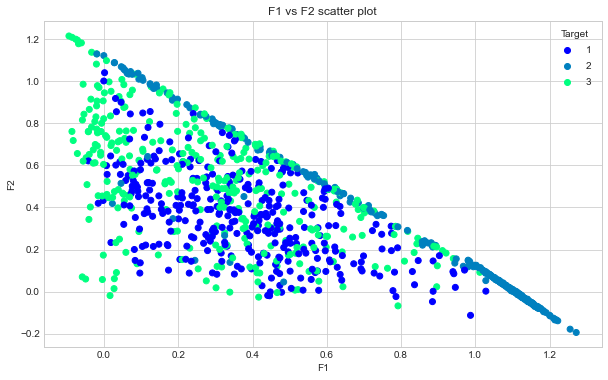

In [28]:
plt.style.use('seaborn-whitegrid')
# OO method from scratch 
fig, ax = plt.subplots(figsize=(10,6))
# plot the data
scatter = ax.scatter(x=train_set['F1'],
                     y=train_set['F2'],
                     c=train_set['L'],
                     cmap="winter")
# customize the plot
ax.set(title='F1 vs F2 scatter plot',
       xlabel='F1',
       ylabel='F2')
# # customize for different graph
# ax.set_xlim([30,80])
# ax.set_ylim([100,450])

# add a lagend
ax.legend(*scatter.legend_elements(), title='Target');
plt.savefig('F1 vs F2[Target L].png')

#### c. Normalise the training set and the test set using StandardScaler() (Hint: the param- eters should come from the training set only) (2 marks)

In [29]:
train_X = train_set.iloc[:,:12]
train_y = train_set.iloc[:,12:]
test_X = test_set.iloc[:,:12]
test_y = test_set.iloc[:,12:]

In [30]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((1000, 12), (1000, 1), (300, 12), (300, 1))

In [31]:
from sklearn import preprocessing

In [32]:
scaler = preprocessing.StandardScaler().fit(train_X)

In [33]:
train_X_norm = scaler.transform(train_X)
test_X_norm = scaler.transform(test_X)

In [34]:
train_X_norm

array([[-0.44170294, -0.51474101,  0.38346925, ..., -0.97602889,
         0.59599254, -0.55706047],
       [-1.07658122,  2.09391937, -1.62261431, ..., -0.34135124,
        -0.79553585,  0.19427163],
       [ 0.05770258, -0.47297877, -0.08462731, ..., -0.3350811 ,
         0.82209926, -0.06619266],
       ...,
       [ 0.28723139,  0.3921902 ,  1.66060618, ..., -0.13736264,
         1.87380178,  0.13471026],
       [ 1.42044636, -0.93006158, -0.45954086, ..., -0.27154366,
        -0.02932969,  0.84571241],
       [-1.38012571,  1.31457674, -0.29218543, ...,  1.62984191,
        -0.89700424, -1.08695125]])

#### d. Perform a PCA analysis on the scaled training set and plot the scree plot to report variances captured by each principal component (3 marks)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=12)

In [37]:
pca.fit(train_X_norm)
pca_X = pca.transform(train_X_norm)

In [38]:
pca_X.shape

(1000, 12)

In [39]:
pca.explained_variance_ratio_

array([0.43898881, 0.19702233, 0.15452741, 0.06734698, 0.06174618,
       0.02845217, 0.01687517, 0.01343859, 0.01023067, 0.00771275,
       0.00261736, 0.00104158])

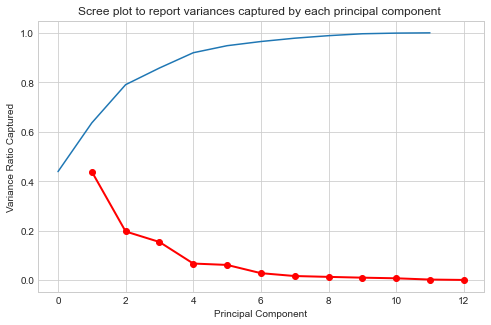

<Figure size 432x288 with 0 Axes>

In [40]:
variances_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
principle_component = np.arange(len(variances_ratio)) + 1
plt.plot(principle_component, variances_ratio, 'ro-', linewidth=2)
plt.title('Scree plot to report variances captured by each principal component ')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio Captured')
pca2 = pca.fit(train_X_norm)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.show()
plt.savefig('Scree plot to report variances captured by each principal component.png');

#### e. Plot two subplots in one figure:
* one for projecting the training set in the projection space constructed using the first principal component (PC1) and the second principal component (PC2); 
* the other one for projecting the training set in the projection space constructed using the second principal component (PC2) and the third principal compo- nent (PC3).

You need to label the data using different colours in the picture according to its class and set the label for the x-axis and y-axis, separately.

In [41]:
from sklearn import decomposition

In [42]:
pca1 = PCA(12)
pca2 = pca1.fit(train_X_norm)
pca3 = PCA(n_components=2)
pca4 = pca3.fit_transform(train_X_norm)
pca5 = PCA(n_components=3)
pca6 = pca5.fit_transform(train_X_norm)
pca7 = PCA(n_components=2)
pca8 = pca7.fit(train_X_norm)

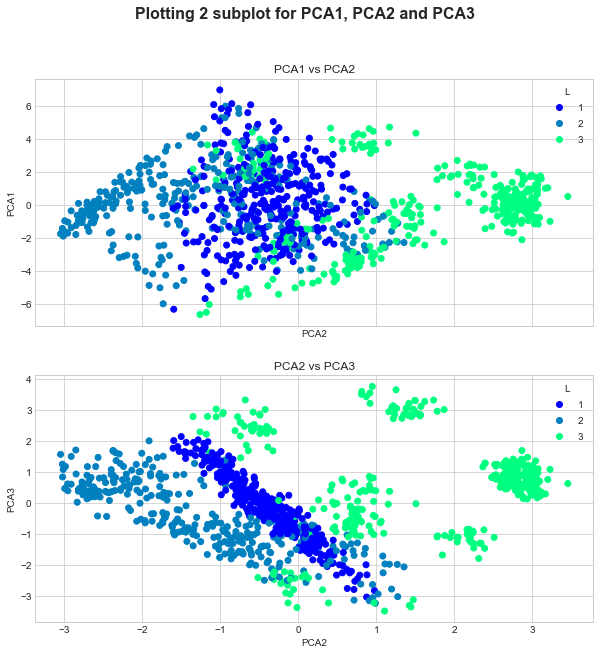

In [43]:
# use matplotlib graph styles
plt.style.use('seaborn-whitegrid')
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                               sharex=True)
# plot the data for axis 1 as ax0
scatter = ax0.scatter(x=pca4[:,1],
                      y=pca4[:,0],
                      c=train_set['L'],
                      cmap='winter')
# customize the plot
ax0.set(title='PCA1 vs PCA2',
       ylabel='PCA1',
       xlabel = 'PCA2')

# add a lagend
ax0.legend(*scatter.legend_elements(), title='L');

# plot the data for axis 1 as ax0
scatter = ax1.scatter(x=pca6[:,1],
                      y= pca6[:,2],
                      c=train_set['L'],
                      cmap='winter')
# customize the plot
ax1.set(title='PCA2 vs PCA3',
       ylabel='PCA3',
       xlabel = 'PCA2')

# add a lagend
ax1.legend(*scatter.legend_elements(), title='L');
# add a titile to figure
fig.suptitle('Plotting 2 subplot for PCA1, PCA2 and PCA3', fontsize=16, fontweight='bold');
plt.savefig('Plotting 2 subplot for PCA1, PCA2 and PCA3.png');

#### f. Obtain projections of the test set by projecting the scaled test data on the same PCA space produced by the training set in Task 1 (d) 

In [44]:
pca_training_set = PCA(2)
pca_training_set.fit(train_X)
pca_training_set_x = pca_training_set.transform(train_X)

In [45]:
pca_scaled_testset = pca_training_set.fit_transform(test_X)

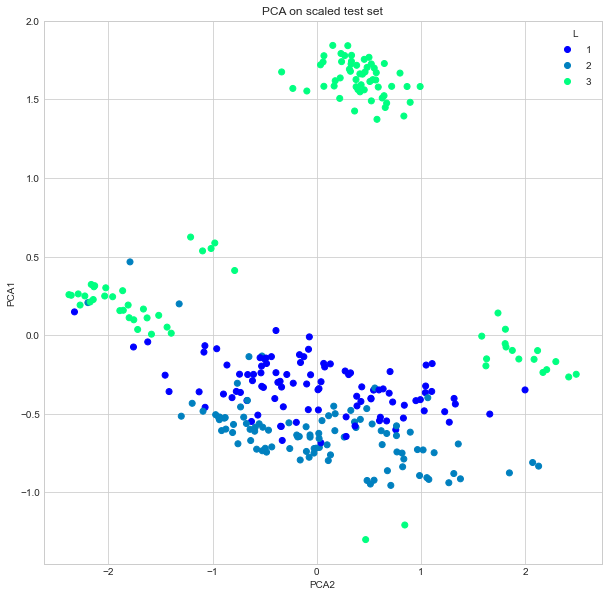

In [46]:
# use matplotlib graph styles
plt.style.use('seaborn-whitegrid')
fig, (ax0) = plt.subplots(nrows=1,
                               ncols=1,
                               figsize=(10,10),
                               sharex=True)
scatter = ax0.scatter(x=pca_scaled_testset[:,0],
                      y=pca_scaled_testset[:,1],
                      c=test_set['L'],
                      cmap='winter')
# customize the plot
ax0.set(title='PCA on scaled test set',
       ylabel='PCA1',
       xlabel = 'PCA2')

# add a lagend
ax0.legend(*scatter.legend_elements(), title='L');
plt.savefig('PCA on scaled test set.png');

# Task #2 - Data preparation

#### a. Divide the training dataset into a smaller training set (II) and a validation set using the train test split function and report the number of points in each set.
Usually, we 2 use 20%-30% of the total data points in the whole training set as the validation data. It is your choice on how to set the exact ratio

In [47]:
train_set.shape

(1000, 13)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.20) 
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((800, 12), (200, 12), (800, 1), (200, 1))

#### b. Normalise both the training set (II) and the validation set (Hint: the parameters should come from the training set (II) only)

In [49]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [50]:
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)

# Task #3 - Non-linear Classification

## a. Basic task
#### i. Choosing the most suitable parameters (3 marks)
When using the C-SVC SVM with the Gaussian radial basis kernel there are two tunable parameters, C (cost) and γ (gamma). You have been given the following combinations: [C=50, γ=10], [C=50, γ=20], [C=100, γ=10], and [C=100, γ=20]. You should train an SVM model for each combination from the given 4 combinations and then test it on the normalised validation set. The accuracy rate for each combination on the validation set should be reported. Finally, you need to select the best combination of parameters and report your result.

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.svm import SVC

In [53]:
model = SVC(gamma=10,C = 50, kernel = 'rbf')        
# train on non-normalize data but test on normalize data
model.fit(X_train, y_train)
model.score(X_val_norm, y_val)

0.325

In [54]:
model = SVC(gamma=20,C = 50, kernel = 'rbf')        
# train on non-normalize data but test on normalize data
model.fit(X_train, y_train)
model.score(X_val_norm, y_val)

0.325

In [55]:
model = SVC(gamma=10,C = 100, kernel = 'rbf')        
# train on non-normalize data but test on normalize data
model.fit(X_train, y_train)
model.score(X_val_norm, y_val)

0.325

In [56]:
X_train.shape, y_val.shape

((800, 12), (200, 1))

In [57]:
model = SVC(gamma=20,C = 100, kernel = 'rbf')        
# train on non-normalize data but test on normalize data
model.fit(X_train, y_train)
model.score(X_val_norm, y_val)

0.325

#### ii. With the normalised whole training set (I) as the input, you will need to train an SVM model with the suitable parameter values discovered for C and γ in Task 3 (a)i.
You should now be in a position to further test your model with the selected pa- rameters by classifying the test data. With the normalised whole training set (I) as the input, you will need to train an SVM model with the suitable parameter values discovered for C and γ in Task 3 (a)i. When the classification model is built you will then need to use it to classify the normalised test set, and report the accuracy rate.

In [58]:
train_X_norm.shape, train_y.shape, test_X_norm.shape, test_y.shape

((1000, 12), (1000, 1), (300, 12), (300, 1))

In [59]:
model = SVC(gamma=20,C = 100, kernel = 'rbf')        
# train on non-normalize data but test on normalize data
model.fit(train_X_norm, train_y)
model.score(test_X_norm, test_y)

0.58

Accuracy increases

In [60]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X_norm)
accuracy_score(test_y, y_pred)

0.58

## b. Advanced task - non-linear classification with features reduced using PCA

#### i. Looking at the scree plot which you have produced in Task 1 (d), how many prin- cipal components (PCs) you would like to use to do feature reduction? Explain the reason (1 mark)

**Answer:** I would choose 4 principle components as after 4 there is little impact of others principle components. Almost 99% of the information retain on 4 principle components. From the line plot of cummulative sum it is also visible.

#### ii. Reduce features for both the normalised training set (I) and the normalised test set using the PCA result from Task 1 with the number of principal components you have decided to use (1 mark)

In [82]:
pca = PCA(n_components=4)
pca.fit(train_X_norm)
reduced_X_train = pca.transform(train_X_norm)
reduced_X_test = pca.transform(test_X_norm)

In [83]:
reduced_X_train.shape, reduced_X_test.shape

((1000, 4), (300, 4))

#### iii. Do the classification using the Gaussian radial basis kernel SVM with parameter values selected in Task 3 (a) (2 marks).
* Normalise the training set and the test set after the feature reduction.
* Train an SVM model on the training set with reduced features.
* Test the model on the corresponding test set, that is the one with reduced fea- tures and report the classification result on the test set

##### Normalise the training set and the test set after the feature reduction.

In [84]:
scaler = preprocessing.StandardScaler().fit(reduced_X_train)
norm_reduced_X_train = scaler.transform(reduced_X_train)
norm_reduced_X_test = scaler.transform(reduced_X_test)

#### Train an SVM model on the training set with reduced features.

In [85]:
from sklearn.svm import SVC
model = SVC(gamma=20,C = 100, kernel = 'rbf')        
# train on non-normalize data but test on normalize data
model.fit(norm_reduced_X_train, train_y)
model.score(norm_reduced_X_test, test_y)

0.93

##### Test the model on the corresponding test set, that is the one with reduced fea- tures and report the classification result on the test set

In [77]:
from sklearn.metrics import classification_report
y_pred = model.predict(norm_reduced_X_test)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.93      0.91        98
           2       0.91      0.88      0.89        98
           3       0.99      0.98      0.99       104

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Finally we got higher accuracy

In [66]:
train_X = train_set.iloc[:,0:12]
train_y = train_set.iloc[:,12]
test_X = test_set.iloc[:,0:12]
test_y = test_set.iloc[:, 12]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((1000, 12), (1000,), (300, 12), (300,))

In [67]:
pca = PCA(n_components=5)
pca.fit(train_X)
reduced_train_X = pca.transform(train_X)
reduced_test_X = pca.transform(test_X)
scaler = preprocessing.StandardScaler().fit(reduced_train_X)
norm_reduced_X_train = scaler.transform(reduced_train_X)
norm_reduced_X_test = scaler.transform(reduced_test_X)

from sklearn.svm import SVC
model = SVC(gamma=20,C = 100, kernel = 'rbf')        
# train on non-normalize data but test on normalize data
model.fit(norm_reduced_X_train, train_y)
model.score(norm_reduced_X_test, test_y)

0.95

In [68]:
from sklearn.metrics import classification_report
y_pred = model.predict(norm_reduced_X_test)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96        98
           2       0.91      0.94      0.92        98
           3       1.00      0.93      0.97       104

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

